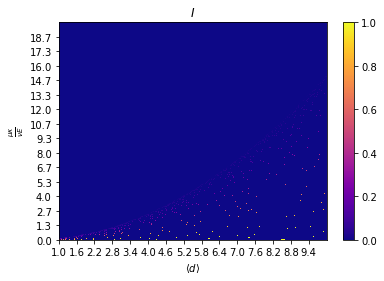

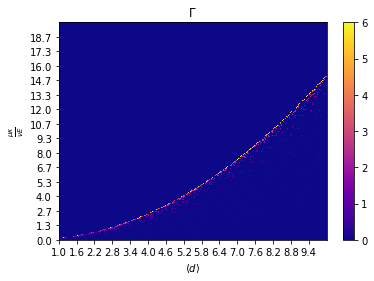

In [5]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy.integrate
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

#for plots
level_min = [2]
level_max = [12]


tol = 0.001
N = 200
M = 300
zeta = 1.5
E = 3000
nu = 2
l_min = 0
l_max = 100
mu_min = 48
mu_max = 240
nmu = 192
nkappa = 800
kappa_min = 200
kappa_max = 1000
meand_min = 1
meand_max = 10
gamma_min = 0
gamma_max = 6
theta_min = 0
theta_max = 20
ntheta = 300
theta = np.linspace(theta_min,theta_max,ntheta) #for system parameters
meand = np.linspace(meand_min,meand_max,M)  #average distance
l = np.linspace(l_min,l_max,N)
gamma = np.linspace(gamma_min,gamma_max,N)
mu = np.linspace(mu_min,mu_max,nmu,dtype=int)
kappa = np.linspace(kappa_min,kappa_max,nkappa,dtype=int)


In = np.zeros((M,N))
II = np.zeros((M,N))
P = np.zeros((M,N))
Il = np.zeros((M,N))
Ill = np.zeros((M,N))
sys = np.zeros((nmu,nkappa))
y = np.zeros((N))
x = np.zeros((M))
F = np.zeros((M,N))
Isol = np.zeros((ntheta,M))
gammasol = np.zeros((ntheta,M))

def f(x):
    if (x!=0):
        return (np.exp(-1/x)*((x)**(-3.1)))*avg
    else:
        return 0

def ff(x):
    if (x!=0):
        return (np.exp(-1/x)*((x)**(-3.1)))
    else:
        return 0
    
def g(x):
    if (x!=0):
        return np.exp(-avg/x)*((x/avg)**(-3.1))
    else:
        return 0

for i in range(0,M):
    avg = meand[i]
    norm = scipy.integrate.quad(f,0,np.inf)[0]
    norm2 = scipy.integrate.quad(g,0,np.inf)[0]

    for j in range(0,N):
        #l[i,j] = j*(l_max-l_min)/(N*avg)
        #P[i,j] = scipy.integrate.quad(f,0,gamma[j])[0]/norm
        In[i,j] = scipy.integrate.quad(f,zeta*gamma[j],np.inf)[0]/norm
        II[i,j] = In[i,j]*gamma[j]*gamma[j]*avg*avg
        #F[i,j] = f(zeta*gamma[j])/norm
        #Il[i,j] = scipy.integrate.quad(g,zeta*l[j],np.inf)[0]/norm2
        #Ill[i,j] = Il[i,j]*l[j]*l[j]

        
# To check dependence of I on <d>--------------------------------------------------------------------
# for i in range(0,M):
#     for j in range(0,M):
#         plt.plot(gamma,F[i,:])
#         plt.plot(gamma,In[i,:])
#         plt.xlabel(r'$\Gamma$')
#         plt.ylabel(r'$I$')

# plt.show()
        
        

# for i in range(0,nmu):
#     for j in range(0,nkappa):
#         sys[i,j] = mu[i]*kappa[j]/(nu*E)



# Uncomment below for loop for phase diagram-----------------------------------------------------------

for i in range(0,ntheta):
    for j in range(0,M):
        for k in range(0,N):
            if (np.absolute(theta[i]-II[j,k])<=tol):
                Isol[i,j] = In[j,k]
                gammasol[i,j] = gamma[k]
                
                
#########################################################################################################
# for t in range(0,M):
#     plt.plot(gamma,In[t])
#     plt.title(r"$I$ Vs $\Gamma$ for different $\langle d \rangle$")
#     plt.xlabel(r'$\Gamma$')
#     plt.ylabel("I")
# plt.show()

# plt.plot(gamma,II[10])
# plt.title(r"$\Gamma^{2}I \langle d \rangle^{2}$ Vs $\Gamma$")
# plt.xlabel(r"$\Gamma$")
# plt.ylabel(r"$\Gamma^{2}I\langle d \rangle^{2}$")
# plt.show()

#X,Y = np.meshgrid(gamma,meand)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(X,Y,II,cmap='viridis')
# ax.set_title(r"$I\Gamma^{2}\langle d \rangle ^{2}(\Gamma,\langle d \rangle)$")
# ax.set_xlabel(r"$\Gamma$")
# ax.set_ylabel(r"$\langle d \rangle$")
# plt.show()

# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, II)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title(r"$I\Gamma^{2}\langle d \rangle ^{2}(\Gamma,\langle d \rangle)$")
# ax.set_xlabel(r"$\Gamma$")
# ax.set_ylabel(r"$\langle d \rangle$")
# plt.show()

# X,Y = np.meshgrid(kappa,mu)
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, sys)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title(r"$\frac{\mu\kappa}{\nu E}$")
# ax.set_ylabel(r"$\mu$")
# ax.set_xlabel(r"$\kappa$")
# plt.show()


#Plot for peak==============================================================================
# for i in range(0,M):
#     plt.plot(gamma,2*In[i],label=r'$2I$')
#     plt.plot(gamma,F[i],label=r'$\zeta \Gamma p\left(\zeta \Gamma \right)$')
#     plt.xlabel(r'$\Gamma$')
#     plt.ylabel(r'$2I, \zeta \Gamma p\left(\zeta \Gamma \right)$')
#     plt.legend()

    
# plt.plot(gamma,2*In[2,],label=r'$2I$')
# plt.plot(gamma,F[2,],label=r'$\zeta \Gamma p\left(\zeta \Gamma \right)$')
# plt.xlabel(r'$\Gamma$')
# plt.ylabel(r'$2I, \zeta \Gamma p\left(\zeta \Gamma \right)$')
# plt.legend()

# plt.savefig('peak.png')
# plt.show()

# plt.plot(gamma,np.log(np.absolute(F[10]-2*In[10])))
# plt.xlabel(r'$\Gamma$')
# plt.ylabel(r'$\log \left(\left| \frac{d\left( I\Gamma^{2}\langle d \rangle ^{2}\right)}{d\Gamma}\right| \right)$')
# plt.savefig('derivative.png')
# plt.show()


# Plot for phase diagram---------------------------------------------------------------------------------------

dfIsol = pd.DataFrame(Isol,columns=meand,index=theta)
plt.pcolor(dfIsol,cmap='plasma')
plt.yticks(np.arange(0, len(dfIsol.index), int(len(dfIsol.index)/15)), np.around(np.arange(theta_min,theta_max,(theta_max-theta_min)*int(len(dfIsol.index)/15)/ntheta),1))
plt.xticks(np.arange(0, len(dfIsol.columns), int(len(dfIsol.columns)/15)), np.around(np.arange(meand_min,meand_max,(meand_max-meand_min)*int(len(dfIsol.columns)/15)/M),1))
plt.ylabel(r"$\frac{\mu \kappa}{\nu E}$")
plt.xlabel(r"$\langle d \rangle$")
plt.title(r"$I$")
plt.colorbar()
#plt.contour(II,colors="green",levels=level_min)
plt.savefig('Isol.png')
plt.show()

dfgammasol = pd.DataFrame(gammasol,columns=meand,index=theta)
plt.pcolor(dfgammasol,cmap='plasma')
plt.yticks(np.arange(0, len(dfgammasol.index), 20), np.around(np.arange(theta_min,theta_max,(theta_max-theta_min)*20/ntheta),1))
plt.xticks(np.arange(0, len(dfgammasol.columns), 20), np.around(np.arange(meand_min,meand_max,(meand_max-meand_min)*20/M),1))
plt.ylabel(r"$\frac{\mu \kappa}{\nu E}$")
plt.xlabel(r"$\langle d \rangle$")
plt.title(r"$\Gamma$")
plt.colorbar()
#plt.contour(II,colors="green",levels=level_min)
plt.savefig('gammasol.png')
plt.show()

########################################################################################################
# df1 = pd.DataFrame(II,columns=gamma,index=meand)
# plt.pcolor(df1,cmap='viridis')
# plt.yticks(np.arange(0, len(df1.index), 50), np.arange(meand_min,meand_max,(meand_max-meand_min)*50/M))
# plt.xticks(np.arange(0, len(df1.columns), 50), np.arange(gamma_min,gamma_max,(gamma_max-gamma_min)*50/N))
# plt.ylabel(r"$\langle d \rangle$")
# plt.xlabel(r"$\Gamma$")
# plt.title(r"$I\Gamma^{2}\langle d \rangle^{2}, \zeta = 1.5$")
# plt.colorbar()
# plt.contour(II,colors="green",levels=level_min)
# plt.show()


# df = pd.DataFrame(sys,columns=kappa,index=mu)
# plt.pcolor(df)
# plt.yticks(np.arange(0, len(df.index), 20), np.arange(mu_min,mu_max,20))
# plt.xticks(np.arange(0, len(df.columns), 100), np.arange(kappa_min,kappa_max,100))
# plt.ylabel(r"$\mu$")
# plt.xlabel(r"$\kappa$")
# plt.title(r"$\frac{\mu\kappa}{\nu E},\nu = 2, E = 3000$")
# plt.colorbar()
# plt.contour(sys,colors="red",levels=level_max)
# plt.show()


# df1 = pd.DataFrame(II,columns=gamma,index=meand)
# plt.pcolor(df1,cmap='viridis',vmin=level_min[0])
# plt.yticks(np.arange(0, len(df1.index), 50), np.arange(meand_min,meand_max,(meand_max-meand_min)*50/M))
# plt.xticks(np.arange(0, len(df1.columns), 50), np.arange(gamma_min,gamma_max,(gamma_max-gamma_min)*50/N))
# plt.ylabel(r"$\langle d \rangle$")
# plt.xlabel(r"$\Gamma$")
# plt.title(r"$I\Gamma^{2}\langle d \rangle^{2}, \zeta = 1.5$")
# plt.colorbar()
# plt.contour(II,colors="green",levels=level_min)
# plt.savefig('IGdfull.png')
# plt.show()


# df = pd.DataFrame(sys,columns=kappa,index=mu)
# plt.pcolor(df,vmax=level_max[0])
# plt.yticks(np.arange(0, len(df.index), 20), np.arange(mu_min,mu_max,20))
# plt.xticks(np.arange(0, len(df.columns), 100), np.arange(kappa_min,kappa_max,100))
# plt.ylabel(r"$\mu$")
# plt.xlabel(r"$\kappa$")
# plt.title(r"$\frac{\mu\kappa}{\nu E},\nu = 2, E = 3000$")
# plt.colorbar()
# plt.contour(sys,colors="red",levels=level_max)
# plt.savefig('sysfull.png')
# plt.show()



# Plots for a given zeta and average d------------------------------------------------------------------------

# for i in range(0,N):
#     y[i] = level_min[0]
    
# for j in range(0,M):
#     x[j] = 0.18

# plt.plot(gamma,II[int(8*M/10)],label=r"$I\Gamma^{2}\langle d \rangle^{2}$")
# plt.plot(gamma,y,'r--',label='Minimum')
# #plt.hlines(int(8*M/10),xmin=0,xmax=1.0)
# plt.xlabel(r"$\Gamma$")
# plt.ylabel(r"$I\Gamma^{2}\langle d \rangle^{2}$")
# plt.title(r"$\langle d \rangle = 9$")
# plt.annotate('Minimum value of $\Gamma$ possible', xy=(0.18, 2), xytext=(0.3, 2.5),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              )
# plt.axvline(x=0.2,ymin=0,ymax=1,ls=':')
# plt.legend()
# plt.savefig('IGDline.png')
# plt.show()

# plt.plot(gamma,In[int(8*M/10)])
# plt.ylabel(r"$I\left( \Gamma \right)$")
# plt.xlabel(r"$\Gamma$")
# plt.title(r"$\zeta = 1.5$")
# plt.axvline(x=0.2,ymin=0,ymax=1,ls=':')
# plt.axhline(y=0.82,ls='--',c='r')
# plt.annotate('Maximum value of I possible', xy=(0.2, 0.82), xytext=(0.5, 0.6),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              )
# plt.savefig('Iline.png')
# plt.show()

###########--------------------------------------------------------------------------------------------------
# Extended plots
# print(meand[240])
# print(II[10,:].argmax())
# print(II[10,9])
# print(In[10,9])

# plt.plot(gamma,In[240,:])
# plt.title(r'$I$')
# plt.xlabel(r"$\Gamma$")
# plt.ylabel(r"$I$")
# plt.title(r'$\zeta = 1.5, \langle d \rangle = 8.2$')
# plt.annotate(r"$I_{*}$", xy=(gamma[9], 0.0074), xytext=(8, 0.2),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              )
# plt.savefig('Ilong.png')
# plt.show()

# plt.plot(gamma,II[240,:])
# plt.xlabel(r"$\Gamma$")
# plt.ylabel(r"$I\Gamma^{2}\langle d \rangle^{2}$")
# plt.title(r'$\zeta = 1.5, \langle d \rangle = 8.2$')
# plt.annotate(r"$I\Gamma^{2}\langle d \rangle^{2}_{max}$", xy=(5, 10.2), xytext=(10, 6),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              )
# plt.savefig('long.png')
# plt.show()

# plt.plot(gamma,F[240,:])
# plt.show()

#-----------------------------------------------------------------------------------------------